In [2]:
import pandas as pd
import numpy as nlp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/Titanic-Dataset.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df=df [['Survived','Sex','Age']]
df=pd.get_dummies(df, columns=['Sex'])
df.dropna(inplace=True)
df.head(5)


,Survived,Age,Sex_female,Sex_male
0,0,22.0,0,1
1,1,38.0,1,0
2,1,26.0,1,0
3,1,35.0,1,0
4,0,35.0,0,1


In [7]:
df.shape

(714, 4)

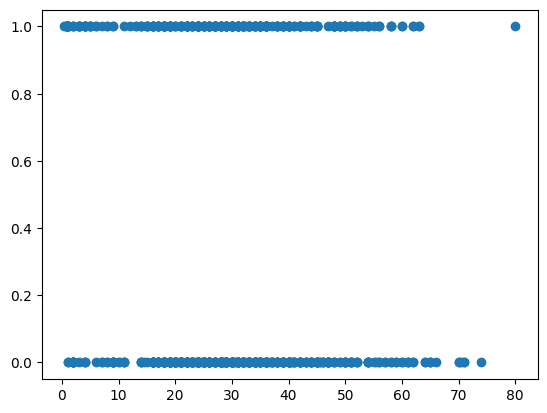

In [8]:
plt.scatter(df.Age,df.Survived)

In [9]:
X=df.iloc[:,1: ]

In [10]:
X


,Age,Sex_female,Sex_male
0,22.0,0,1
1,38.0,1,0
2,26.0,1,0
3,35.0,1,0
4,35.0,0,1
...,...,...,...
885,39.0,1,0
886,27.0,0,1
887,19.0,1,0
889,26.0,0,1


In [11]:
y=df.iloc[:,:1]

In [12]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
885,0
886,0
887,1
889,1


data splitting

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)

fit model

In [15]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()


In [16]:
clf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [17]:
#test
y_pred = clf.predict(X_test)
y_pred[:5]

array([0, 0, 1, 0, 1])

In [18]:
y_test[:5].values

array([[0],
       [0],
       [1],
       [0],
       [1]])

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [20]:
accuracy_score(y_test, y_pred)*100

78.32167832167832

In [21]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[68, 14],
       [17, 44]])

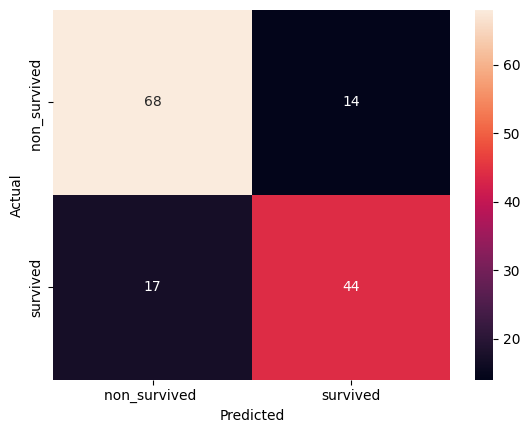

In [22]:
sns.heatmap(cm, annot=True, xticklabels=['non_survived ','survived'], yticklabels=['non_survived ','survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted');

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        82
           1       0.76      0.72      0.74        61

    accuracy                           0.78       143
   macro avg       0.78      0.78      0.78       143
weighted avg       0.78      0.78      0.78       143

